In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("mincpcap_cppp.csv")
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,1.330,1.330,1.330,1.330,1.330,1.330,1.330,1.330,1.330,...,10.7,10.9,11.2,11.4,11.7,12.0,12.3,12.6,12.8,13.2
1,Angola,0.779,0.781,0.785,0.789,0.791,0.795,0.799,0.802,0.806,...,19.8,20.2,20.6,21.0,21.4,21.9,22.3,22.7,23.2,23.6
2,Albania,0.919,0.921,0.924,0.927,0.929,0.932,0.935,0.937,0.940,...,56.7,57.4,58.0,58.6,59.2,59.8,60.5,61.1,61.7,62.3
3,Andorra,1.880,1.880,1.880,1.890,1.890,1.890,1.900,1.900,1.900,...,87.1,87.4,87.8,88.1,88.4,88.7,89.0,89.3,89.6,89.9
4,UAE,1.650,1.660,1.670,1.670,1.680,1.680,1.690,1.700,1.700,...,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,103.0


In [4]:
print("Column Names:", df.columns)

Column Names: Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=302)


In [5]:
df_long = df.melt(id_vars=['country'], var_name='Year', value_name='Income')


In [6]:
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long['Income'] = pd.to_numeric(df_long['Income'], errors='coerce')

In [7]:
df_long.dropna(inplace=True)

In [8]:
summary = df_long.groupby('Year')['Income'].agg(['mean', 'min', 'max']).reset_index()
summary.columns = ['Year', 'Average_Income', 'Min_Income', 'Max_Income']


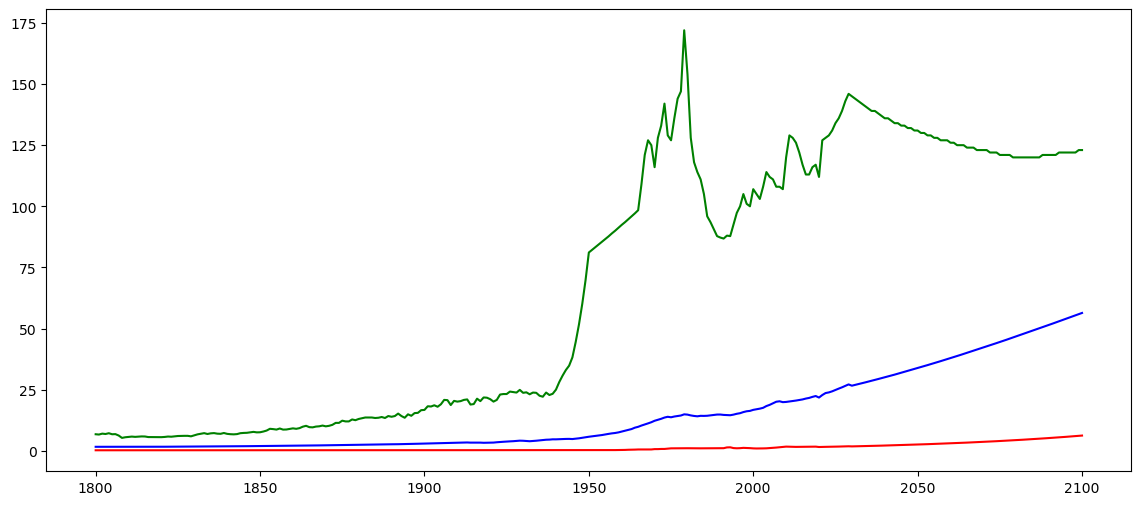

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(summary['Year'], summary['Average_Income'], label='Average Income', color='blue')
plt.plot(summary['Year'], summary['Min_Income'], label='Min Income', color='red')
plt.plot(summary['Year'], summary['Max_Income'], label='Max Income', color='green')
